# Dynamic Strategy/Regime
The simulation of Havercroft, Didelez (2012) is static in the sense that the intervention A is not a function of L or other variables. Although A does depend on L, the current A (dose or treatment) is not adjusted based on previous values of L. Therefore, the treatment strategy is irrespective of any other observations made on the patient.

We want to extend this to the case where there is a dynamic non-random relationship between the treatment decisions and a time-varying covariate. In this case the time at which a given patient will receive treatment is not pre-determined. We then want to simulate data incorporating the dynamic strategy and investigate how different methods perform, for example IPW, adjusted regression, G-formula etc.

**Dynamic treatment strategy**: Any well-specified way of adjusting the choice of the next decision(treatment or dose to administer) in the light of previous information constitutes a dynamic decision (or treatment) strategy

# Current Set-Up
Based on Figure 1 in HD(2012), we begin with the same factorization

$$P(U, L, W, A, Y)=P(U)P(L | U)P(A | L)P(Y | U,A)$$
Previously, we would have made an intervention do(A=a) of the form

$$ P(U, L, W, Y|do(A=a)) =
  \begin{cases}
    P(U)P(L|U)P(Y|U,A) & \quad \text{if } A = a\\
    0  & \quad \text{if } A \neq a\\
  \end{cases}
$$

From the DAG in figure 1 we see a path from U to L and from L to A, but also a path from U to Y. We can block the path from U to A by conditioning on L or equivalently by conditioning on U:

$$P(Y|do(A=a)) = \sum_l P(Y | L=l, A=a)P(L=l|A=a)$$

If we extend the set-up to include a dynamic treatment decision where the value of the CD4 count determines the treatment based on a threshold, then we have more than one strategy. For example, we might have the rule, if CD4 count falls below 100 then we treat, otherwise we do not treat

$$a = g(a, l) = 
  \begin{cases}
    1 & \quad \text{if } l \lt 100\\
    0  & \quad \text{if } l \ge 100\\
  \end{cases}
$$

In which case in the one-shot case we can express the factorization as
# IGNORE FOLLOWING

$$ P(U, L, W, Y|do(A=g(a, l))) =
  \begin{cases}
    P(U)P(L|U)P(Y|U,A) & \quad \text{if } L \lt \tau\\
    P(U)P(L|U)P(Y|U,A) & \quad \text{if } L \ge \tau\\
    0  & \quad \text{if } A \neq g(a, l)\\
  \end{cases}
$$


C:\Users\morle001\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\morle001\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\morle001\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\morle001\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

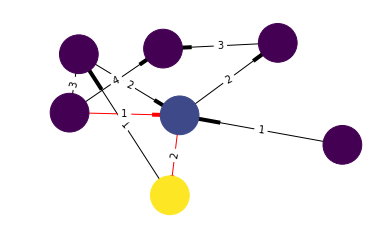

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()
